In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()
data.shape

(272, 2)

### Initialize your cluster centers

In [3]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    # initialize cluster centers.
    # Make sure you choose k clusters from the data itself,
    # or ensure otherwise that your initializations have the same scaling as the data
    num_samples, num_features = data.shape
    return data[np.random.choice(num_samples, k)]

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [4]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    input
        data: number of samples, number of features
        mu: k (number of clusters), number of features 
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    num_samples, num_features = data.shape
    k = mu.shape[0]
    distance = []
    for i in range(k):
        # Diff_sq is the difference of all data points
        # to mu_i
        diff_sq = np.square(data - mu[i, :])
        sum_squares = np.sum(diff_sq, axis=1)
#         print(diff_sq)
        # When you append diff_sq to distance, you will 
        # therefore have the transpose of the result you want.
        distance.append(sum_squares)
#         print(sum_squares)
#     print(distance)
    return np.array(distance).T

In [5]:
data = np.array([[0, 0], 
                 [1, 1]])
mu = np.array([[0, 0], 
               [2, 2]])
build_distance_matrix(data, mu)

array([[0, 8],
       [2, 2]])

#### Update k-means parameters

In [6]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    _, num_features = data.shape
    k, _ = mu_old.shape
    
    distance_matrix = build_distance_matrix(data, mu_old)
#     print(distance_matrix)
    losses = np.min(distance_matrix, axis=1)
#     print(losses)
    assignments = np.argmin(distance_matrix, axis=1)
#     print(assignments)
    
    # update the mu
    mu = np.empty((k, num_features))
    for i in range(k):
        # the indices of the data points where the assignments correspond to i
        rows = np.where(assignments == i) 
#         print("rows: {}".format(rows))
        # The actual data points
        data_points = np.squeeze(data[rows, :])
#         print(data_points)
        mu[i, :] = np.mean(data_points, axis=0)
    
    return losses, assignments, np.nan_to_num(mu)

In [7]:
X = np.array([[4, 7], 
              [3, 4], 
              [5, 6], 
              [6, 5]])
# mu = np.array([[0, 0], 
#                [5, 10]])

# losses, assignments, mu = update_kmeans_parameters(X, mu)

#### Play with k-means

Initial: [[0 0]
 [0 0]
 [1 1]]
average: [[0. 0.]
 [0. 0.]
 [1. 1.]]
The current iteration of k-means is: 0,                the average loss is 0.0.


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


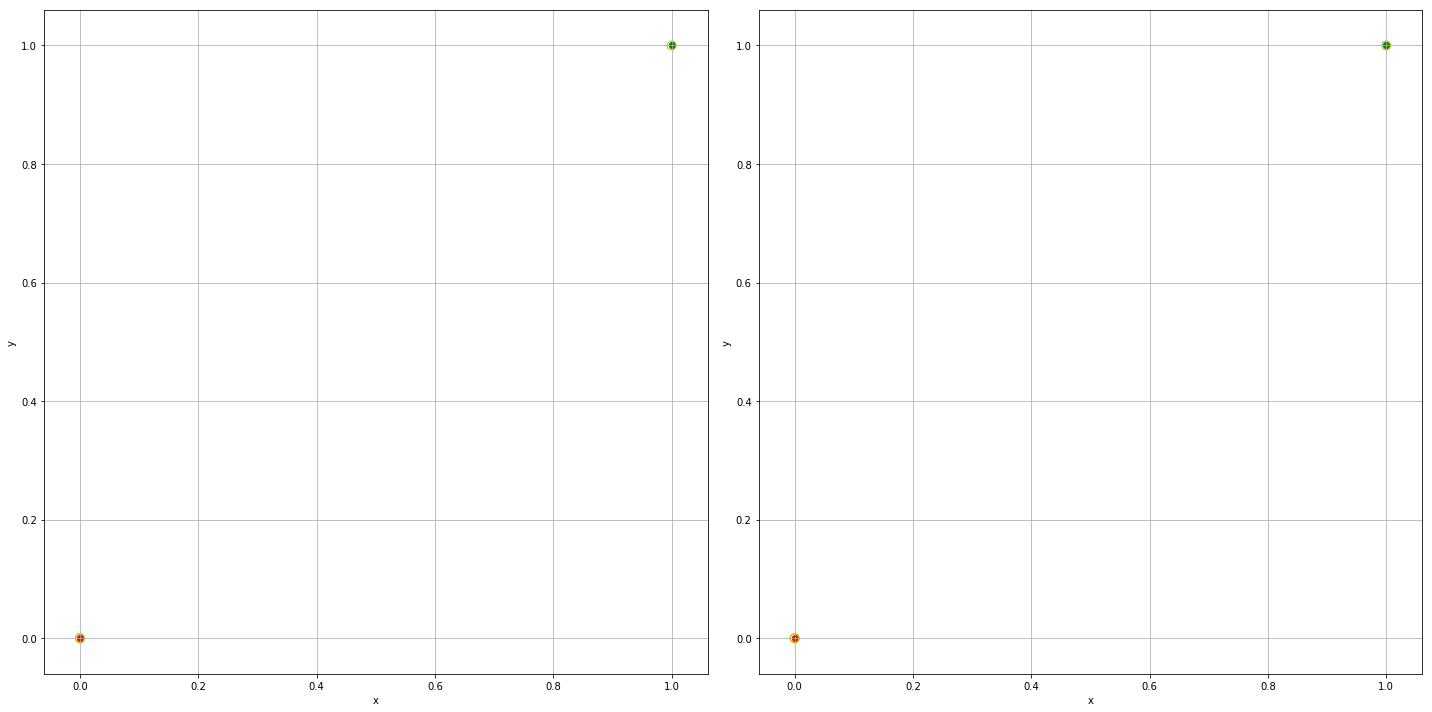

average: [[0. 0.]
 [0. 0.]
 [1. 1.]]
The current iteration of k-means is: 1,                the average loss is 0.0.


In [12]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    print("Initial: {}".format(mu_old))
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        print("average: {}".format(mu))
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 3
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [9]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [13]:
def preprocess_image(original_image):
    """preprocess the image."""
    # TODO: make pixel values of each color (which is a matrix) 
    # into a vector. **don't normalize!**    
    processed_image = original_image.reshape((original_image.shape[0]*original_image.shape[1], 3))
    processed_image = processed_image.astype(float)
    print("Current image: the shape of image={s}, the data type={dt}.".format(
        s=processed_image.shape, 
        dt=processed_image.dtype))
    return processed_image

processed_image = preprocess_image(original_image)

Current image: the shape of image=(230400, 3), the data type=float64.


The current iteration of kmeans is: 0, the average loss is 4035.1271614583334.
The current iteration of kmeans is: 10, the average loss is 1632.7885919691971.
The current iteration of kmeans is: 20, the average loss is 1631.9777056454504.
The current iteration of kmeans is: 30, the average loss is 1631.9693537883184.


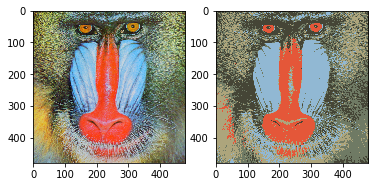

In [16]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    # Initialize
    mu_old = initialize_clusters(processed_image, k)
    # init some empty lists to store the result.
    loss_list = []
    
    # Start kmeans
    for iter in range(max_iter):
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)

        if iter % 10 == 0:
            print("The current iteration of kmeans is: {i}, the average loss is {l}.".format(
                    i=iter, l=average_loss))
        
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break

        # update mu
        mu_old = mu

    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)